R Magic
===============

In [2]:
# activate R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Load the data
==================
we load two dataset

In [3]:
%%R
courserating <- read.csv("/content/drive/MyDrive/Colab Notebooks/AI_relative/Data_mining_in_R/tutorial/dataset/recommendation_system/courserating.csv",
                     stringsAsFactors = FALSE)

head(courserating)

   X SQL Spatial PA1 DM.in.R Python Forecast R.Prog Hadoop Regression
1 LN   4      NA  NA      NA      3        2      4     NA          2
2 MH   3       4  NA      NA      4       NA     NA     NA         NA
3 JH   2       2  NA      NA     NA       NA     NA     NA         NA
4 EN   4      NA  NA       4     NA       NA      4     NA          3
5 DU   4       4  NA      NA     NA       NA     NA     NA         NA
6 FL  NA       4  NA      NA     NA       NA     NA     NA         NA


In [4]:
%%R
coursetopics.df <- read.csv("/content/drive/MyDrive/Colab Notebooks/AI_relative/Data_mining_in_R/tutorial/dataset/recommendation_system/Coursetopics.csv",
                     stringsAsFactors = FALSE)

head(coursetopics.df)

  Intro DataMining Survey Cat.Data Regression Forecast DOE SW
1     1          1      0        0          0        0   0  0
2     0          0      1        0          0        0   0  0
3     0          1      0        1          1        0   0  1
4     1          0      0        0          0        0   0  0
5     1          1      0        0          0        0   0  0
6     0          1      0        0          0        0   0  0


Correlation
==================

In [5]:
%%R
library(readxl)

In [6]:
%%R
courserating.df <- as.data.frame(courserating)
courserating.df

    X SQL Spatial PA1 DM.in.R Python Forecast R.Prog Hadoop Regression
1  LN   4      NA  NA      NA      3        2      4     NA          2
2  MH   3       4  NA      NA      4       NA     NA     NA         NA
3  JH   2       2  NA      NA     NA       NA     NA     NA         NA
4  EN   4      NA  NA       4     NA       NA      4     NA          3
5  DU   4       4  NA      NA     NA       NA     NA     NA         NA
6  FL  NA       4  NA      NA     NA       NA     NA     NA         NA
7  GL  NA       4  NA      NA     NA       NA     NA     NA         NA
8  AH  NA       3  NA      NA     NA       NA     NA     NA         NA
9  SA  NA      NA   4      NA     NA       NA     NA     NA         NA
10 RW  NA      NA   2      NA     NA       NA     NA      4         NA
11 BA  NA      NA   4      NA     NA       NA     NA     NA         NA
12 MG  NA      NA   4      NA     NA        4     NA     NA         NA
13 AF  NA      NA   4      NA     NA       NA     NA     NA         NA
14 KG 

In [7]:
%%R
str(courserating.df)

'data.frame':	15 obs. of  10 variables:
 $ X         : chr  "LN" "MH" "JH" "EN" ...
 $ SQL       : int  4 3 2 4 4 NA NA NA NA NA ...
 $ Spatial   : int  NA 4 2 NA 4 4 4 3 NA NA ...
 $ PA1       : int  NA NA NA NA NA NA NA NA 4 2 ...
 $ DM.in.R   : int  NA NA NA 4 NA NA NA NA NA NA ...
 $ Python    : int  3 4 NA NA NA NA NA NA NA NA ...
 $ Forecast  : int  2 NA NA NA NA NA NA NA NA NA ...
 $ R.Prog    : int  4 NA NA 4 NA NA NA NA NA NA ...
 $ Hadoop    : int  NA NA NA NA NA NA NA NA NA 4 ...
 $ Regression: int  2 NA NA 3 NA NA NA NA NA NA ...


get row name

In [8]:
%%R
row.names <- courserating.df[,1]
row.names

 [1] "LN" "MH" "JH" "EN" "DU" "FL" "GL" "AH" "SA" "RW" "BA" "MG" "AF" "KG" "DS"


get column name

In [9]:
%%R
col.names <- names(courserating)
col.names

 [1] "X"          "SQL"        "Spatial"    "PA1"        "DM.in.R"   
 [6] "Python"     "Forecast"   "R.Prog"     "Hadoop"     "Regression"


compute correlation values  
We could compute correlations between LN-EN pair and DS-EN pair, because them have more than one common course with EN.

In [10]:
%%R
LN <- as.numeric(courserating.df[1,])
EN <- as.numeric(courserating.df[4,])
DS <- as.numeric(courserating.df[15,])

corLN_EN <- cor(LN, EN, method=c("pearson"), use=("pairwise.complete.obs"))
corDS_EN <- cor(DS, EN, method=c("pearson"), use=("pairwise.complete.obs"))
print(corLN_EN)
print(corDS_EN)

[1] 1
[1] NA


we can use cor on data.frame directly, but it will regard columns as vectors

In [11]:
%%R
corC <- cor(courserating.df[2:10], method=c('pearson'), use=c("pairwise.complete.obs"))
corC

                  SQL   Spatial PA1 DM.in.R Python Forecast R.Prog Hadoop
SQL         1.0000000 0.8660254  NA      NA     -1       NA     NA     NA
Spatial     0.8660254 1.0000000  NA      NA     NA       NA     NA     NA
PA1                NA        NA   1      NA     NA       NA     NA     NA
DM.in.R            NA        NA  NA       1     NA       NA     NA     NA
Python     -1.0000000        NA  NA      NA      1       NA     NA     NA
Forecast           NA        NA  NA      NA     NA        1     NA     NA
R.Prog             NA        NA  NA      NA     NA       NA     NA     NA
Hadoop             NA        NA  NA      NA     NA       NA     NA     NA
Regression         NA        NA  NA      NA     NA       NA     NA     NA
           Regression
SQL                NA
Spatial            NA
PA1                NA
DM.in.R            NA
Python             NA
Forecast           NA
R.Prog             NA
Hadoop             NA
Regression          1


so we need to transform the data.frame first

In [12]:
%%R
transform.df <- as.data.frame(t(courserating.df))
transform.mtrx <- data.matrix(transform.df[2:10,])
corR <- cor(transform.mtrx, method=c('pearson'), use=c("pairwise.complete.obs"))
corR

    V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15
V1   1 -1 NA  1 NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V2  -1  1 NA NA NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V3  NA NA NA NA NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V4   1 NA NA  1 NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V5  NA NA NA NA NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V6  NA NA NA NA NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V7  NA NA NA NA NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V8  NA NA NA NA NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V9  NA NA NA NA NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V10 NA NA NA NA NA NA NA NA NA   1  NA  NA  NA  NA  NA
V11 NA NA NA NA NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V12 NA NA NA NA NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V13 NA NA NA NA NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V14 NA NA NA NA NA NA NA NA NA  NA  NA  NA  NA  NA  NA
V15 NA NA NA NA NA NA NA NA NA  NA  NA  NA  NA  NA   1


Similarity
===================
install the packages

In [13]:
%%R
install.packages("recommenderlab")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘RcppProgress’, ‘arules’, ‘proxy’, ‘registry’, ‘irlba’, ‘recosystem’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/RcppProgress_0.4.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 12077 bytes (11 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to conso

In [14]:
%%R
library(recommenderlab)

R[write to console]: Loading required package: Matrix

R[write to console]: Loading required package: arules

R[write to console]: 
Attaching package: ‘arules’


R[write to console]: The following objects are masked from ‘package:base’:

    abbreviate, write


R[write to console]: Loading required package: proxy

R[write to console]: 
Attaching package: ‘proxy’


R[write to console]: The following object is masked from ‘package:Matrix’:

    as.matrix


R[write to console]: The following objects are masked from ‘package:stats’:

    as.dist, dist


R[write to console]: The following object is masked from ‘package:base’:

    as.matrix


R[write to console]: Loading required package: registry

R[write to console]: Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy



In [15]:
%%R
mtrx <- as.matrix(courserating.df[2:10])
mtrx

      SQL Spatial PA1 DM.in.R Python Forecast R.Prog Hadoop Regression
 [1,]   4      NA  NA      NA      3        2      4     NA          2
 [2,]   3       4  NA      NA      4       NA     NA     NA         NA
 [3,]   2       2  NA      NA     NA       NA     NA     NA         NA
 [4,]   4      NA  NA       4     NA       NA      4     NA          3
 [5,]   4       4  NA      NA     NA       NA     NA     NA         NA
 [6,]  NA       4  NA      NA     NA       NA     NA     NA         NA
 [7,]  NA       4  NA      NA     NA       NA     NA     NA         NA
 [8,]  NA       3  NA      NA     NA       NA     NA     NA         NA
 [9,]  NA      NA   4      NA     NA       NA     NA     NA         NA
[10,]  NA      NA   2      NA     NA       NA     NA      4         NA
[11,]  NA      NA   4      NA     NA       NA     NA     NA         NA
[12,]  NA      NA   4      NA     NA        4     NA     NA         NA
[13,]  NA      NA   4      NA     NA       NA     NA     NA         NA
[14,] 

we need to convert mtrx to "realRatingMatrix"

In [16]:
%%R
r <- as(mtrx, "realRatingMatrix")
r

15 x 9 rating matrix of class ‘realRatingMatrix’ with 30 ratings.


In [17]:
%%R
str(r)

Formal class 'realRatingMatrix' [package "recommenderlab"] with 2 slots
  ..@ data     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:30] 0 1 2 3 4 14 1 2 4 5 ...
  .. .. ..@ p       : int [1:10] 0 6 12 18 20 22 24 27 28 30
  .. .. ..@ Dim     : int [1:2] 15 9
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : chr [1:9] "SQL" "Spatial" "PA1" "DM.in.R" ...
  .. .. ..@ x       : num [1:30] 4 3 2 4 4 4 4 2 4 4 ...
  .. .. ..@ factors : list()
  ..@ normalize: NULL


In [18]:
%%R
userSim <- similarity(r, method="pearson", which = "users")
userSim

     1   2   3   4   5   6   7   8   9  10  11  12  13  14
2  0.5                                                    
3   NA  NA                                                
4  1.0  NA  NA                                            
5   NA  NA  NA  NA                                        
6   NA  NA  NA  NA  NA                                    
7   NA  NA  NA  NA  NA  NA                                
8   NA  NA  NA  NA  NA  NA  NA                            
9   NA  NA  NA  NA  NA  NA  NA  NA                        
10  NA  NA  NA  NA  NA  NA  NA  NA  NA                    
11  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA                
12  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA            
13  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA        
14  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA    
15  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA


Item-based recommendation
==============================

In [19]:
%%R
IB.Rec <- Recommender(r, "IBCF")
pred <- predict(IB.Rec, r[4,], n=1, type="topNList")
as(pred, "matrix")

     SQL Spatial PA1 DM.in.R Python Forecast R.Prog Hadoop Regression
[1,]  NA       4  NA      NA     NA       NA     NA     NA         NA


Association rules
=======================
we use retail dataset  
any time when you wants to check the associationg rules, don't forget these four steps  
1.  get the .df
2.  convert to the matrix (get .mat)
3.  get the .trans
4.  use apriori to get the rules
5.  inspect the rules.

In [20]:
%%R
install.packages("arulesViz")
library(arulesViz)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘zoo’, ‘foreach’, ‘viridis’, ‘gtools’, ‘caTools’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘hexbin’, ‘data.table’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘plotly’, ‘visNetwork’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/iterators_1.0.13.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 288559 bytes (281 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

In [22]:
%%R
library(readr)
library(arules)

explore all rules
--------------------

In [23]:
%%R
coursetopics.mat <- as.matrix(coursetopics.df)
coursetopics.trans <- as(coursetopics.mat, "transactions")
rules <- apriori(coursetopics.trans, parameter = list(supp = 0, conf = 0, target="rules"))
rules
# inspect(head(sort(rules, by="lift"), n=10))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          0    0.1    1 none FALSE            TRUE       5       0      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8 item(s), 365 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 done [0.00s].
writing ... [1016 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
set of 1016 rules 


here are 1016 rules, plot all rules

R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



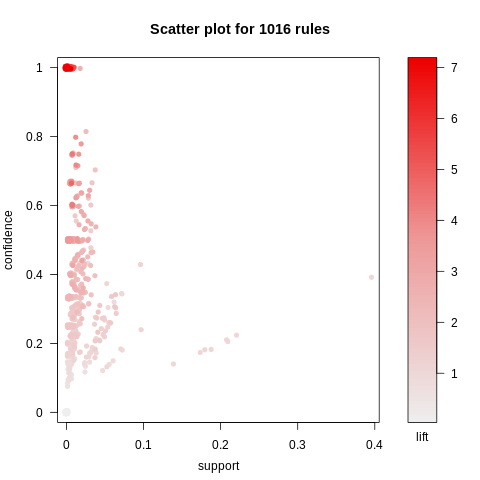

In [24]:
%%R
plot(rules)

Here we can see most rules generate in the area whose $support \in [0, 0.1]$ and $confidence \in [0.05, 0.8]$ so we makes a new rules.  
rule 1
-------------

In [25]:
%%R
rules1<- apriori(coursetopics.trans, parameter = list(supp= 0, conf = 0.4, maxlen=3,target = "rules"))
inspect(sort(rules1, by="lift"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5       0      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8 item(s), 365 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [58 rule(s)] done [0.01s].
creating S4 object  ... done [0.00s].
     lhs                        rhs          support    confidence coverage  
[1]  {DataMining,DOE}        => {Cat.Data}   0.01643836 0.6666667  0.02465753
[2]  {Survey,Regression}     => {Cat.Data}   0.01643836 0.6666667  0.02465753
[3]  {DataMining,Regression} => {Forecast}   0.01917808 0.43

let's try to find non-redundant rules

In [26]:
%%R
redR1 <- is.redundant(rules1)
nonRedR1 <- rules1[!redR1]
inspect(sort(nonRedR1, by="lift"))

     lhs                        rhs          support    confidence coverage  
[1]  {DataMining,DOE}        => {Cat.Data}   0.01643836 0.6666667  0.02465753
[2]  {Survey,Regression}     => {Cat.Data}   0.01643836 0.6666667  0.02465753
[3]  {DataMining,Regression} => {Forecast}   0.01917808 0.4375000  0.04383562
[4]  {DataMining,Regression} => {Cat.Data}   0.02739726 0.6250000  0.04383562
[5]  {Intro,DOE}             => {SW}         0.03013699 0.6470588  0.04657534
[6]  {Regression,DOE}        => {SW}         0.01917808 0.6363636  0.03013699
[7]  {Regression,Forecast}   => {DataMining} 0.01917808 0.5000000  0.03835616
[8]  {Cat.Data,Regression}   => {DataMining} 0.02739726 0.5000000  0.05479452
[9]  {Survey,DOE}            => {Cat.Data}   0.01917808 0.5833333  0.03287671
[10] {Survey,Forecast}       => {Cat.Data}   0.02191781 0.5714286  0.03835616
[11] {Cat.Data,Forecast}     => {Survey}     0.02191781 0.5000000  0.04383562
[12] {DataMining,Cat.Data}   => {Regression} 0.02739726 0.555555

rule 2
--------------------
let's increase the support a little to find more association rules

In [27]:
%%R
rules2<- apriori(coursetopics.trans, parameter = list(supp= 0.03, conf = 0.7, maxlen=3,target = "rules"))
inspect(sort(rules2, by="lift"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.03      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8 item(s), 365 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                rhs     support    confidence coverage   lift     count
[1] {Regression,SW} => {Intro} 0.03835616 0.7        0.05479452 1.774306 14   


remove Intro
--------------------

In [ ]:
%%R
noIntro <- as.matrix(coursetopics.df[,-1])
noIntro.trans <- as(noIntro, "transactions")
noIntroRules <- apriori(noIntro.trans, parameter = list(supp = 3/365, conf = 183/365, target = "rules"))
inspect(head(sort(noIntroRules, by = "lift"), n = 20))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime     support minlen
  0.5013699    0.1    1 none FALSE            TRUE       5 0.008219178      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[7 item(s), 365 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                               rhs          support     confidence
[1]  {Survey,Forecast,DOE}          => {Cat.Data}   0.008219178 1.0000000 
[2]  {Survey,Forecast,SW}           => {Cat.Data}   0.008219178 1.0000000 
[3]  {DataMining,Survey,DOE}        => {Cat.Data}   0.00821

remove Intro and CatData
-----------------------

In [ ]:
%%R
noIntroandCat.mat <- as.matrix(coursetopics.df[, c(-1, -4)])
noIntroandCat.trans <- as(noIntroandCat.mat, "transactions")
noIntroandCatRules <- apriori(noIntroandCat.trans, parameter = list(supp = 2/365, conf = 183/365, target = "rules"))
inspect(head(sort(noIntroandCatRules, by = "lift"), n = 30))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime     support minlen
  0.5013699    0.1    1 none FALSE            TRUE       5 0.005479452      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 365 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                             rhs          support     confidence
[1] {Survey,Regression,SW}       => {DOE}        0.005479452 1.0000000 
[2] {Survey,Regression,Forecast} => {DataMining} 0.005479452 1.0000000 
[3] {Regression,Forecast,SW}     => {DataMining} 0.005479452 0.666666